<a href="https://colab.research.google.com/github/meryemcivcik/software-engineering-project/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen

from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bitcoin-stock-data-sept-17-2014-august-24-2021:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1549839%2F3204533%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240602%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240602T130602Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5be08e92dbe6044675f916f038469752dcb187cae4aa8172017f3bf05c05f2b57396011912c0cfe1b40735d0b99a937531a81e5b17158e42b2345eb1a9f2d6f4503aa46dc96a4d459cae1790c408c1884bd6f6e810f50b1275b7d55d09ec3b77435ff729a23fd08af68bce6e2b64db74d6e692cee1c555ebb1011b3857dc16748d21a3fff6ae708d6bb1777d72990d7c42749cf4303c0bb006f95bbe9c462ecb90aacde2fe84ab956d4a5e19b0a390f2faa318b2934660fced0918591111144eae76fedc229a816f8dd9dc564358ecc3c85a4caa424fa7a659bca2f9e8b9c89684f53fdd5bd9fbdfaeff406f08a9a0ab4468e37ad7def842030204eddd62b99e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 77757 bytes downloaded
Downloaded and uncompressed: bitcoin-stock-data-sept-17-2014-august-24-2021
Data source import complete.


# Bitcoin Price Prediction

## Introduction

This project aims to predict Bitcoin prices using various machine learning models. Bitcoin, as a highly volatile and widely traded cryptocurrency, presents a unique challenge for price prediction. The project involves data preprocessing, feature engineering, model training, and evaluation. Initially, a Linear Regression model was implemented. This notebook expands the analysis by adding additional models for comparison.

## Questions and Answers

### 1. Feature Selection

#### Relevant Features
For predicting Bitcoin prices, relevant features can include:
- **Open, High, Low, Close Prices**: Historical price data.
- **Volume**: Trading volume can indicate market activity and interest.
- **Daily Return**: Percentage change in closing price, indicating daily market movement.
- **Moving Averages (e.g., 50-Day MA, 200-Day MA)**: To capture trends and smooth out volatility.

#### Impact of External Factors
- **Market Sentiment**: News articles, social media trends, and public sentiment can significantly impact Bitcoin prices.
- **Macroeconomic Indicators**: Interest rates, inflation rates, and economic policies can influence investor behavior.
- **Regulatory News**: Announcements from regulatory bodies can cause sudden market movements.

### 2. Time Series Data Preprocessing

#### Challenges
- **Seasonality**: Repeating patterns at regular intervals can affect predictions.
- **Trends**: Long-term increase or decrease in data, which needs to be accounted for.
- **Non-stationarity**: Statistical properties of the series change over time.

#### Handling Issues
- **Differencing**: Applying differencing to remove trends and make the data stationary.
- **Decomposition**: Separating the series into trend, seasonality, and residual components.
- **Scaling**: Normalizing or standardizing data to ensure consistent scale across features.

### 3. Algorithm Selection for Time Series Prediction

#### Comparison of Algorithms
- **ARIMA**: Suitable for univariate time series data with clear trends and seasonality but lacks the ability to handle multiple input features.
- **LSTM (Long Short-Term Memory)**: Effective for capturing long-term dependencies and patterns in time series data. Suitable for sequential data.
- **Random Forest**: Can handle both time series data and a variety of input features, capturing complex interactions but may not perform well with sequential dependencies compared to LSTM.

#### Influencing Factors
- **Data Complexity**: The algorithm choice depends on the nature and complexity of the data.
- **Computational Resources**: Some algorithms, like LSTM, require more computational power.
- **Model Interpretability**: Some models provide better interpretability (e.g., Random Forest) compared to others (e.g., LSTM).

### 4. Hyperparameter Tuning

#### Role of Hyperparameter Tuning
Hyperparameter tuning involves adjusting the model parameters to optimize performance. It helps in finding the best configuration that minimizes prediction error.

#### Specific Hyperparameters
- **Learning Rate**: Controls the step size in the optimization process (important for gradient-based algorithms like LSTM).
- **Number of Trees (Random Forest)**: More trees can improve performance but increase computational cost.
- **Window Size (LSTM)**: The number of past observations used for prediction.
- **Order Parameters (ARIMA)**: p (autoregressive), d (differencing), q (moving average).

### 5. Handling Cryptocurrency Market Volatility

#### Model Design
- **Adaptive Models**: Use models that can adapt to new data quickly, like online learning algorithms.
- **Ensemble Methods**: Combine predictions from multiple models to improve robustness.
- **Feature Engineering**: Include features that capture market sentiment and external factors influencing volatility.
- **Regular Updates**: Continuously retrain the model with new data to maintain accuracy.


# Data Exploration


- Load Bitcoin dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/bitcoin-stock-data-sept-17-2014-august-24-2021/BTC-USD.csv')

- Display dataset preview.


In [ ]:
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


- Summary statistics.

In [ ]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count   2713.000000   2713.000000   2713.000000   2713.000000   2713.000000   
mean   11311.041069  11614.292482  10975.555057  11323.914637  11323.914637   
std    16106.428891  16537.390649  15608.572560  16110.365010  16110.365010   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      606.396973    609.260986    604.109985    606.718994    606.718994   
50%     6301.569824   6434.617676   6214.220215   6317.609863   6317.609863   
75%    10452.399414  10762.644531  10202.387695  10462.259766  10462.259766   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.713000e+03  
mean   1.470462e+10  
std    2.001627e+10  
min    5.914570e+06  
25%    7.991080e+07  
50%    5.098183e+09  
75%    2.456992e+10  
max    3.509679e+11  



- Check for missing values.

In [ ]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


> Check column names.

In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


- Convert date format.


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

- Set date as index.


In [ ]:
df.set_index('Date', inplace=True)

- Check missing values.

In [ ]:
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



- Confirm index change.

In [ ]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


# Data Visualization

1. Plot Bitcoin closing prices.


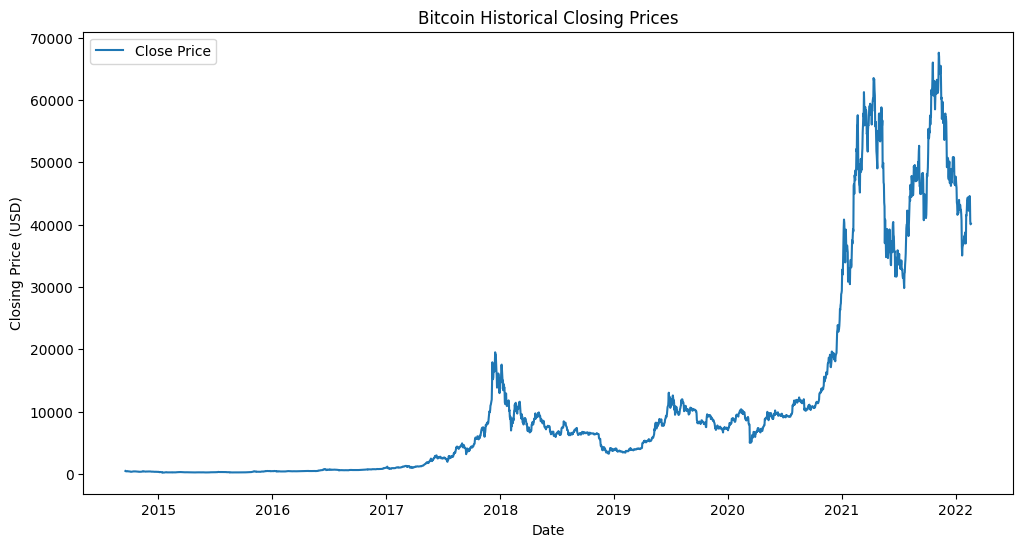

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

2. Explore variable relationships.


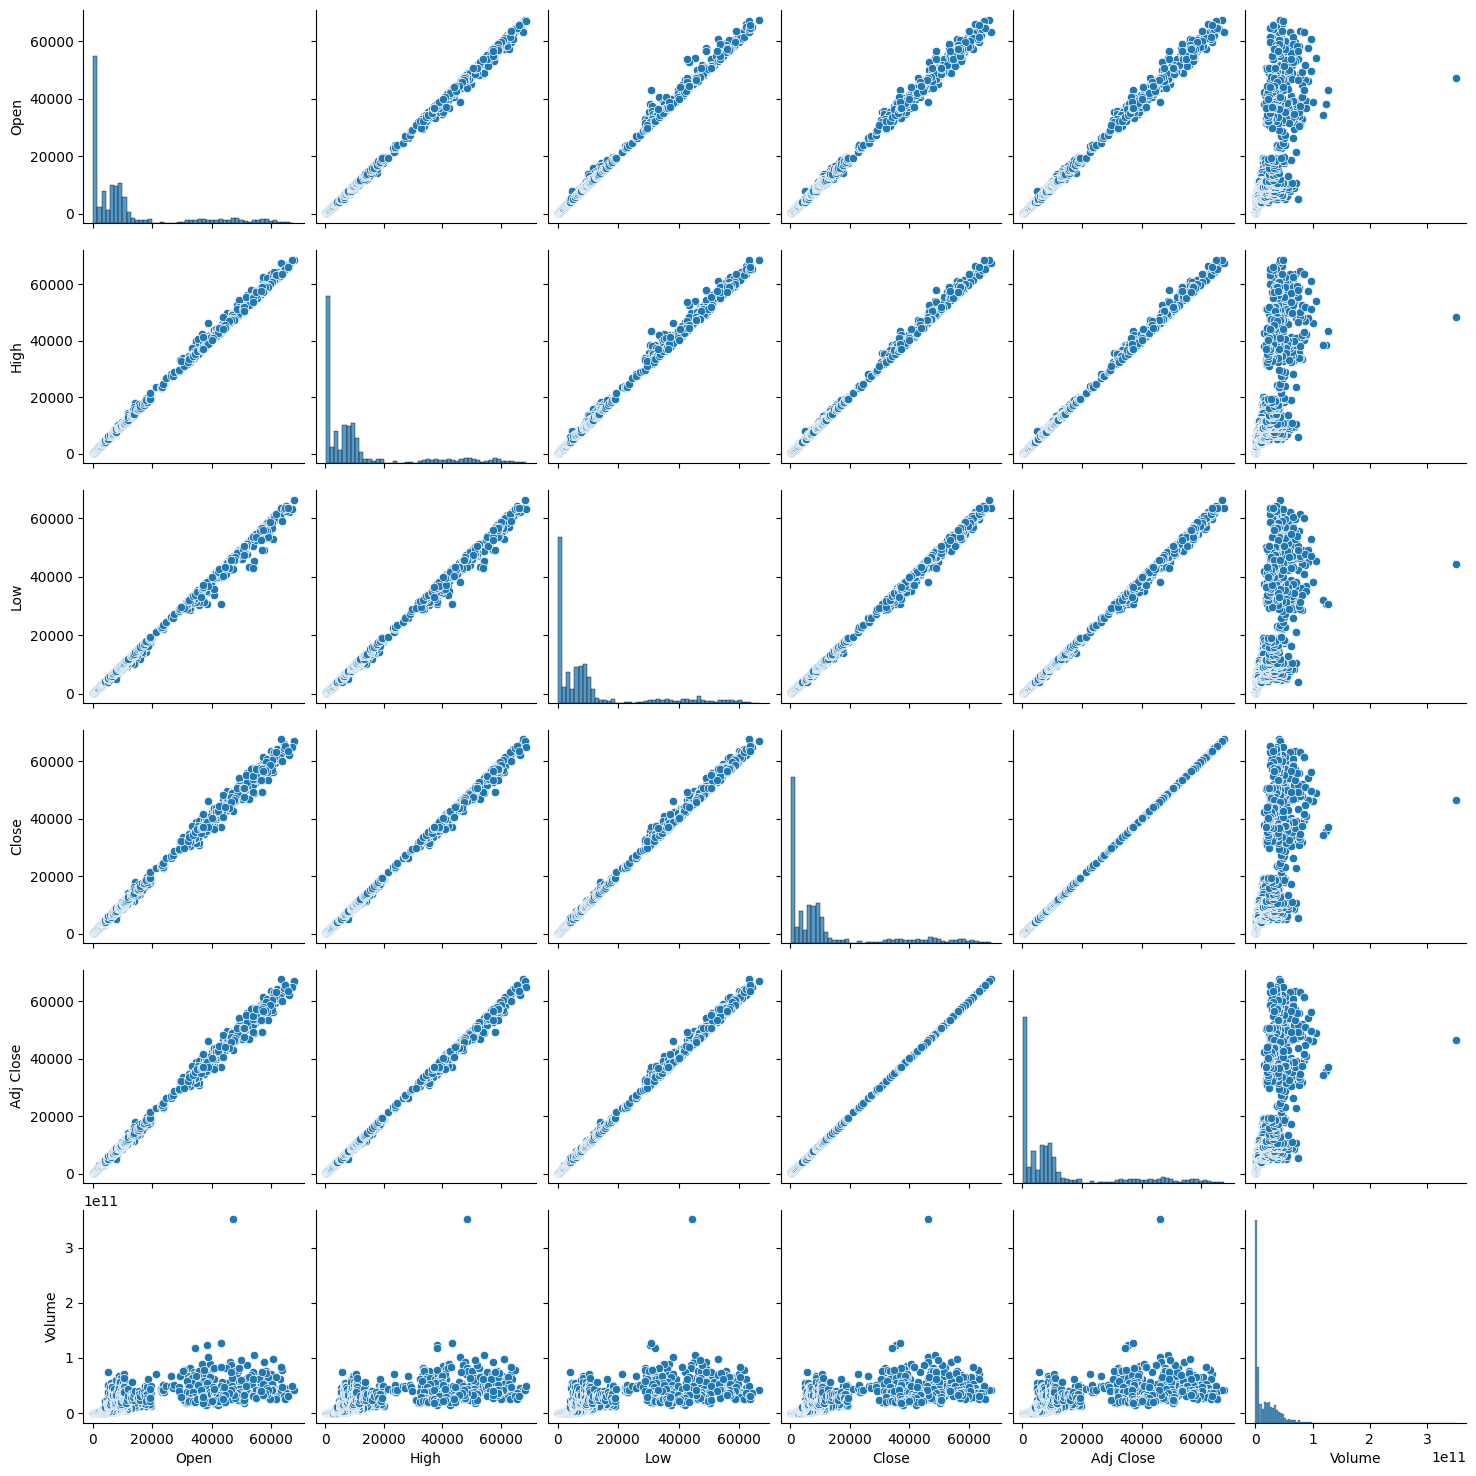

In [ ]:
sns.pairplot(df)
plt.show()

3. Visualize correlation heatmap.

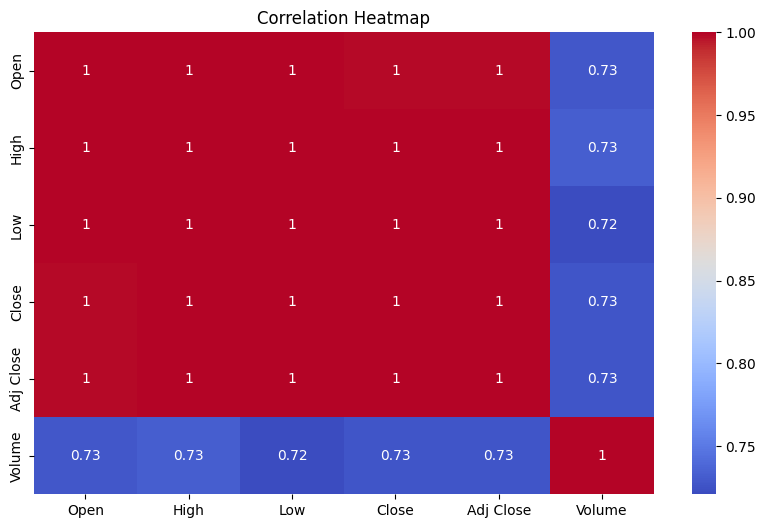

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

1. Calculate daily returns.


In [ ]:
df['Daily Return'] = df['Close'].pct_change()

2. Compute moving averages.

In [ ]:
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

df.dropna(inplace=True)


3. Plot close price and moving averages.

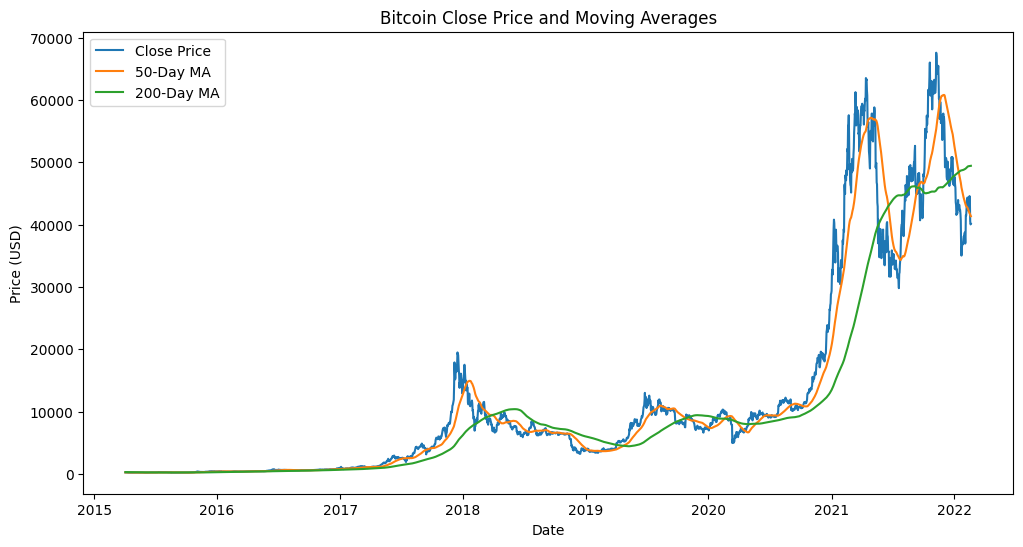

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['50-Day MA'], label='50-Day MA')
plt.plot(df['200-Day MA'], label='200-Day MA')
plt.title('Bitcoin Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Model Training : Linear Regression

1. Split data for training/testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Train Linear Regression model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

3. Evaluate performance metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 114401.79520067666
R^2 Score: 0.9995467039487862



4. Visualize predictions vs. actuals.

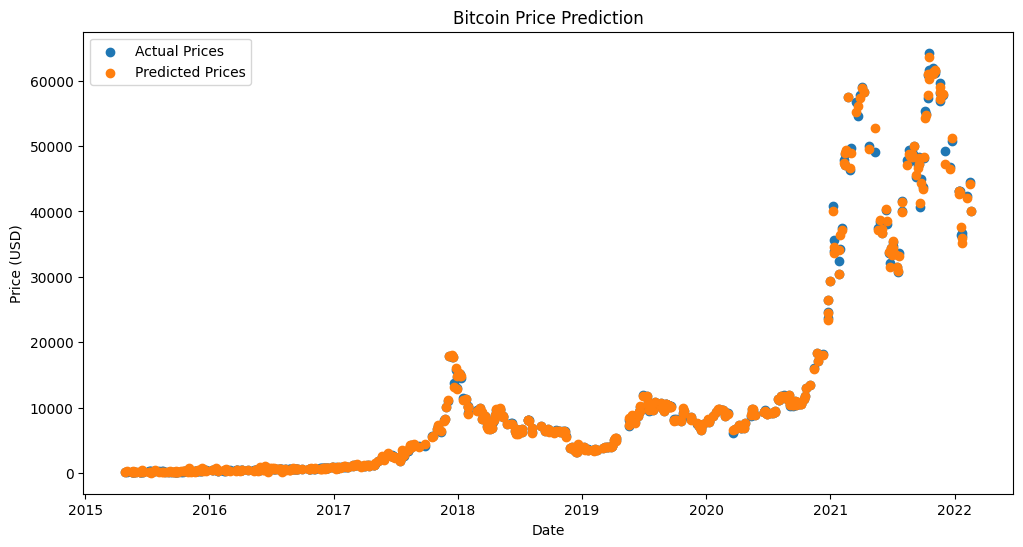

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Model Training : Random Forest

1. Train Random Forest model.
.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

2. Evaluate performance metrics.


In [ ]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R^2 Score: {rf_r2}')

Random Forest - Mean Squared Error: 147117.85540977112
Random Forest - R^2 Score: 0.9994170725834912


 3. Visualize predictions vs. actuals

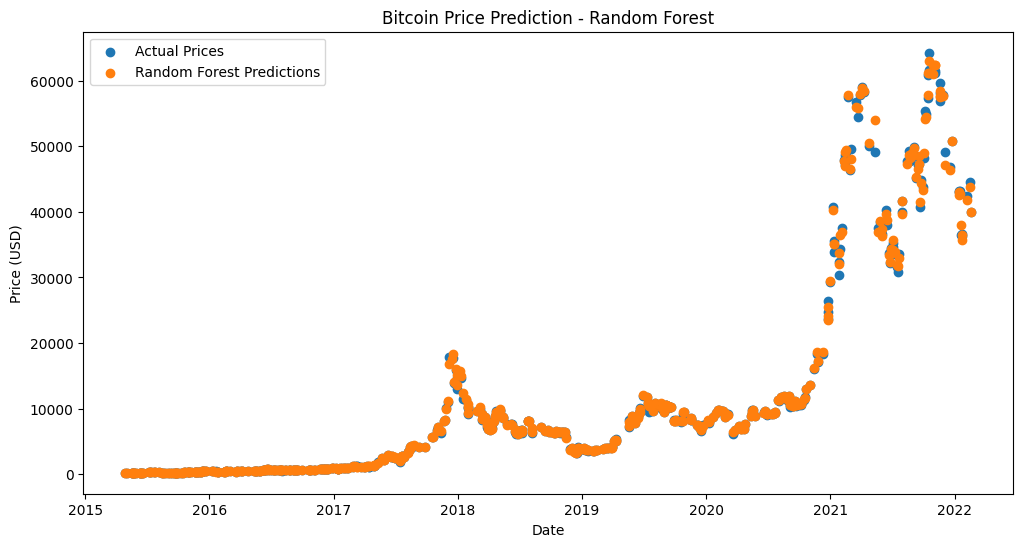

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, rf_y_pred, label='Random Forest Predictions')
plt.title('Bitcoin Price Prediction - Random Forest')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Model Training: Decision Trees

1. Train Decision Tree model.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

2. Evaluate performance metrics.


In [ ]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f'Decision Tree - Mean Squared Error: {dt_mse}')
print(f'Decision Tree - R^2 Score: {dt_r2}')

Decision Tree - Mean Squared Error: 317943.2105065771
Decision Tree - R^2 Score: 0.9987402085642094


3. Visualize predictions vs. actuals.

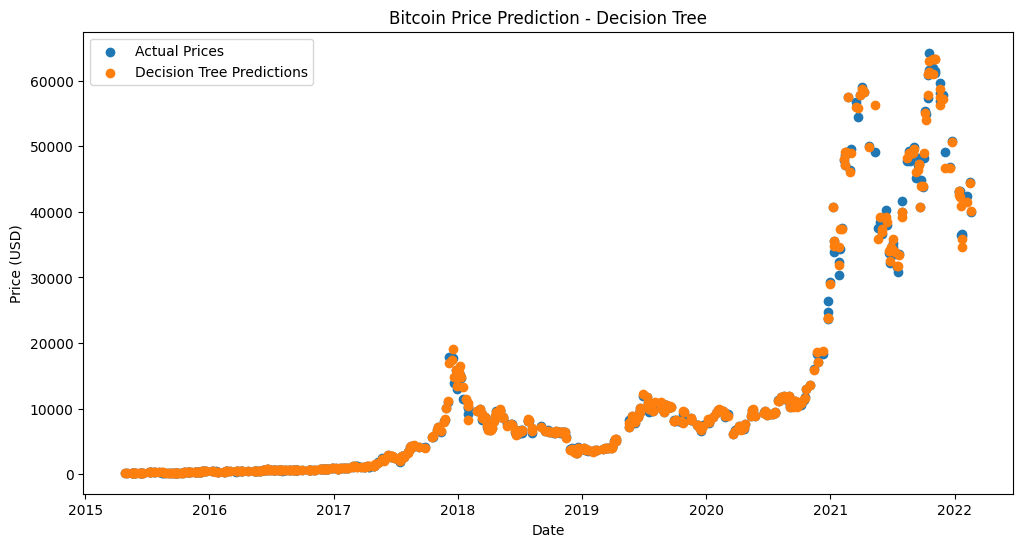

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, dt_y_pred, label='Decision Tree Predictions')
plt.title('Bitcoin Price Prediction - Decision Tree')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

1. Aggregate evaluation metrics.



In [ ]:
lr_metrics = {'Model': 'Linear Regression',
              'MSE': mse,
              'R^2': r2}

rf_metrics = {'Model': 'Random Forest',
              'MSE': rf_mse,
              'R^2': rf_r2}

dt_metrics = {'Model': 'Decision Tree',
              'MSE': dt_mse,
              'R^2': dt_r2}

all_metrics = [lr_metrics, rf_metrics, dt_metrics]

2. Plot MSE comparison.


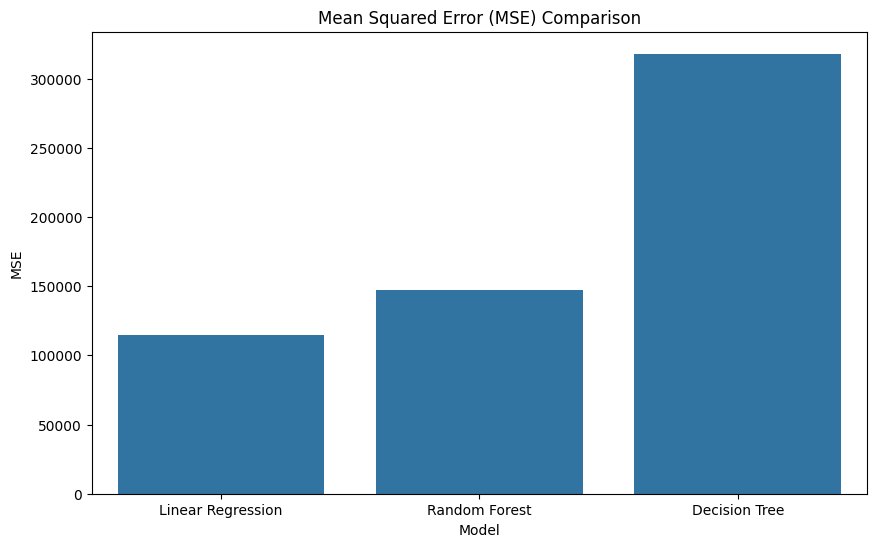

In [ ]:
metrics_df = pd.DataFrame(all_metrics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=metrics_df)
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()

3. Plot R-squared comparison.

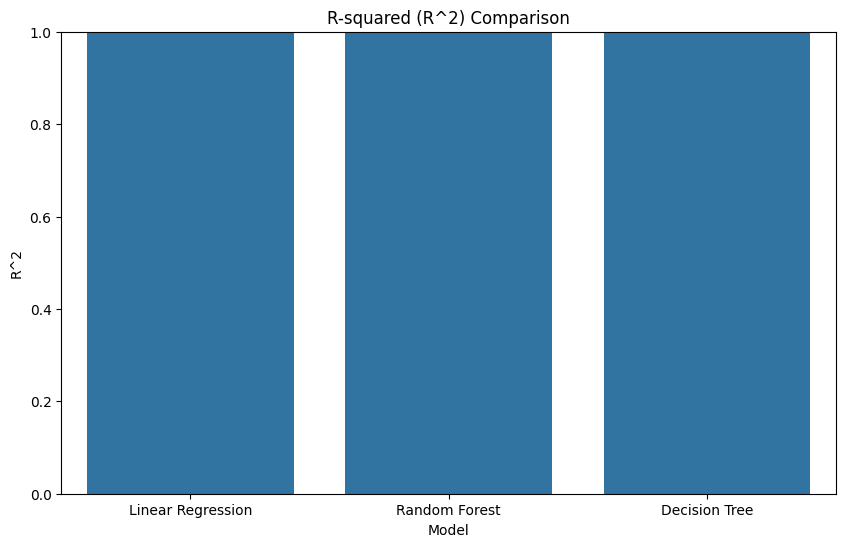

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=metrics_df)
plt.title('R-squared (R^2) Comparison')
plt.ylim(0, 1)  # Since R^2 score is between 0 and 1
plt.show()